Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [16]:
NAME = "Gasper Bizjan"

---

## 11 Strong and weak Interpolation

In this assignment we will discuss the different concepts of interpolation. Let $\Omega\subset\mathbb{R}^n$  a domain and $f\colon\Omega\to\mathbb{R}$ a continuos, integrable fucntion. 

Let assume a triangulation $\tau_h$ of $\Omega$ w.r.t points $\{x_i\}_i^{N_p-1}$. In case $n=2$ the triangulation is a set of triangles and in case of $n=1$ $\tau_h$ is a set of intervals. A functions is called discrete function w.r.t. a global discrete basis if 
$$
f_h(x) = \sum_{i=0}^{N_p-1} F_i \varphi_i(x). 
$$ 
for degrees of freedom $f_i$. We call it nodal or strong interpolation if 
$$
f(x_j) = f_h(x_j) \qquad \forall j=0,...,N_p-1
$$ and weak interpolation or $L2$-projection if $f_h$ hold 
$$
\int_\Omega f_h \varphi_j = \int_\Omega f\varphi_j \qquad \forall j=0,...,N_p-1.
$$

### 11.1 Import 
Create a global Basis called ```globalB``` on the unit square. Import all the ingredients from the ```python```-files.  

In [17]:
from basis import Basis, GlobalBasis
from grid import Grid

# grid, basis
g = Grid(0, 1, 0, 1, 10, 10)
b = Basis()

# global basis
globalB = GlobalBasis(g, b)

globalB

### 11.2 - DiscreteFunction class
Implement a class ```DiscreteFunction``` that represents the discrete function $f_h = \sum_{i=0}^{N_p-1} F_i \varphi_i$. This discrete function will be the nodal interpolation. 

#### 11.2.0 Preparation (not graded)
In the Lecture we introduced the condition for the degrees of freedom $F_j = f(x_j)$ for all $j=0,...,N_p-1$ in case of the nodal or strong interpolation. Consider why. <br>

$f_h$ is a global evaluateable function. Consider why it is complecated to calcuate $f_h(x,y)$ and why it is mush easier to evaluate $f_h$ w.r.t a point in the reference element $(\hat{x},\hat{y})$ and triangle of our grid $T$. Show the following condition 
$$
f_h(F_T(\hat{x},\hat{y})) = \sum\limits_{i \colon (x_i,y_i) \text{ edge point of }T }  F_i \hat{\phi}_{D(i,T)} (\hat{x},\hat{y}).
$$


#### 11.2.1 Constructor
The contructor gets a global basis and should store it as a member ```globalBasis```. Please consider, such that you also have access to all the members of this globalBasis. Further more it should inital a member ```values``` as a representation of the degrees of freedom $F_i$ for all $i=0,1,...,N_p-1$. Inital the array filled with zeros. <br>
<b>INPUT:</b> ```globalBasis```, global basis class. 

#### 11.2.2 Interpolation
Write a member function ```interpolate``` which interpolates a lambda function nodal. <br>
<b>INPUT:</b> ```f``` lambda function of the form ```f = lambda x,y: foo ```. 

#### 11.2.3 Evaluation
Write a member function ```evalLocal``` which evaluates $f_h(F_T(\hat{x},\hat{y}))$ for a point on the reference Element $(\hat{x},\hat{y})$ and for triangel $T$.        
<b>INPUT:</b> ```xHat``` set of points on the reference element as array with shape $N_p \times 2$. <br>
<b>OUTPUT:</b> evaluation of $f_h$ in all points and in all triangles as array with shape $N_c \times N_p$. <br>

Hint:<br>
``` fh = DiscreteFunction(globalB)``` <br>
``` xHat = np.array([[x1,y1] , [x2,y2] , ... ]) ```<br>
```fh.evalLocal(xHat)[T][i]``` $ = f_h(F_T(\hat{x}_i,\hat{y}_i))$

#### 11.2.3 show
Write a function ```show``` which plot the discrete function on the domain. You can either plot the graph of the function in 3d or the color plot. 

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as triang

class DiscreteFunction:
    def __init__(self, globalBasis):
        self.globalBasis = globalBasis
        self.values = np.zeros(len(globalBasis.grid.getPoints()))
        
    def interpolate(self, f):
        for i in range(len(self.values)):
            value_discrete = f(self.globalBasis.grid.getPoints()[i][0], self.globalBasis.grid.getPoints()[i][1])
            self.values[i] = value_discrete # Calculate discrete values of f(x,y) for points with coord. x,y and add them 
            
    def evalLocal(self, xHat):
        f_h = np.zeros((len(self.globalBasis.grid.cells), len(xHat))) # zero array of fh size Nc x Np
        phi = self.globalBasis.basis.evalPhi(xHat) # evaluated Phi
        for pointInd in range(len(self.globalBasis.grid.getPoints())): # for every point in grid
            for pHatInd in range(len(xHat)): # and for every point in reference element
                supp, localInd = self.globalBasis.evalDOFMap(pointInd) # indices of cells in the support and corresponding local basis indices
                for cellInd in range(len(localInd)): # for all cells calculate fh
                    f_h[supp[cellInd], pHatInd] = (f_h[supp[cellInd], pHatInd] + self.values[pointInd]*phi[pHatInd, localInd[cellInd]])
        return f_h
    
    def show(self):
        triangulation = triang.Triangulation(self.globalBasis.grid.getPoints()[:, 0], self.globalBasis.grid.getPoints()[:, 1])
        fig = plt.figure(figsize=(10, 10))
        ax = fig.add_subplot(111, projection="3d")
        ax.plot_trisurf(triangulation, self.values)
        ax.set_xlabel(r'$x$')
        ax.set_ylabel(r'$y$')
        ax.set_zlabel(r'$f_h$')
        plt.show()
        
fh = DiscreteFunction(globalB)
fh.interpolate(lambda x,y:x+y)
fh.evalLocal(np.array([[0,0],[1,0],[0,1]]))

array([[0.        , 0.11111111, 0.11111111],
       [0.22222222, 0.11111111, 0.11111111],
       [0.11111111, 0.22222222, 0.22222222],
       [0.33333333, 0.22222222, 0.22222222],
       [0.22222222, 0.33333333, 0.33333333],
       [0.44444444, 0.33333333, 0.33333333],
       [0.33333333, 0.44444444, 0.44444444],
       [0.55555556, 0.44444444, 0.44444444],
       [0.44444444, 0.55555556, 0.55555556],
       [0.66666667, 0.55555556, 0.55555556],
       [0.55555556, 0.66666667, 0.66666667],
       [0.77777778, 0.66666667, 0.66666667],
       [0.66666667, 0.77777778, 0.77777778],
       [0.88888889, 0.77777778, 0.77777778],
       [0.77777778, 0.88888889, 0.88888889],
       [1.        , 0.88888889, 0.88888889],
       [0.88888889, 1.        , 1.        ],
       [1.11111111, 1.        , 1.        ],
       [0.11111111, 0.22222222, 0.22222222],
       [0.33333333, 0.22222222, 0.22222222],
       [0.22222222, 0.33333333, 0.33333333],
       [0.44444444, 0.33333333, 0.33333333],
       [0.

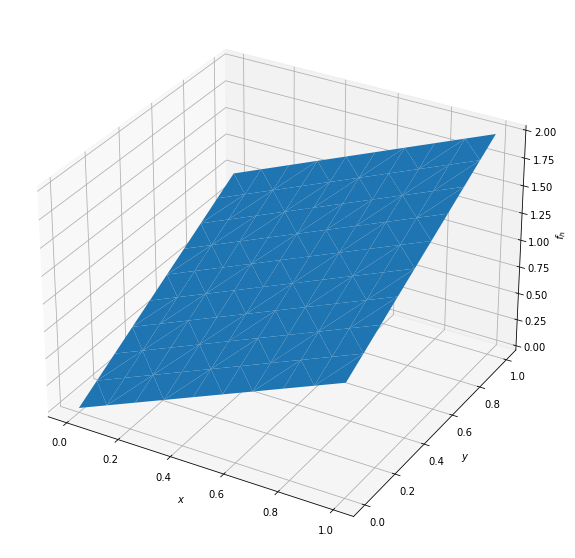

In [50]:
fh = DiscreteFunction(globalB)
fh.interpolate(lambda x,y:x+y)
fh.show()

### 11.3 Weak Interpolation

Let assume an interval $\Omega = [-1,1]$ and triangulation $\tau_h$ w.r.t. the nodes $\{x_i\}=\{ -1,0,1\}$. Consider the function $f(x) = \cos(4 \pi x)$. 

#### 11.3.1 Global Basis
Give the global basis function $\varphi_j$ on $\Omega$ for $j=0,1,2$. (3 points)

#### 11.3.2 Nodal Interpolation
Compute the strong interpolation $f_s$ of the function $f$. (2 points) 

#### 11.3.3 Weak Interpolation
Compute the weak interpolation $f_w$ of the function $f$. (5 points)

#### 11.3.4 Comparation
Give an interpretation of $f_w$ and $f_s$ from a mathematical point of view. (2 points)


Look at attached pdf